# Pass Network

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
%matplotlib inline

In [2]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [3]:
import pprint

In [4]:
def lineup(file):     
    
    players = []

    for i in file:        
        players.append(i['player']['name'])
       
    
    return players

In [5]:
lineup = lineup(events[1]['tactics']['lineup'])

In [6]:
lineup

['Anne Moorhouse',
 'Kate Longhurst',
 'Gilly Louise Scarlett Flaherty',
 'Brooke Hendrix',
 'Claire Lauren Rafferty',
 'Lucienne Reichardt',
 'Julia Simic',
 'Brianna Visalli',
 'Alisha Lehmann',
 'Esmee de Graaf',
 'Jane Ross']

In [7]:
events[2]

{'id': 'ecf61eb6-37e5-41da-842b-3a3d0d22bfec',
 'index': 3,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 18, 'name': 'Half Start'},
 'possession': 1,
 'possession_team': {'id': 965, 'name': 'Brighton & Hove Albion WFC'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 965, 'name': 'Brighton & Hove Albion WFC'},
 'duration': 0.0,
 'related_events': ['6a85f892-4648-4540-91b7-1d0aae2d5cce']}

In [8]:
passes = []
c = 0
for i in events:
    if 'pass' in i.keys():
        passes.append(i)
        c=c+1

c

855

In [9]:
successful_passes = []
c = 0
for i in passes:
    if ('recipient' in i['pass'].keys()) and (i['team']['id'] == 965):
        successful_passes.append(i)
        c = c + 1
        
c

400

### Pass connection dataframe

In [10]:
id_players = []
players = []
x_starts = []
y_starts = []
id_recipients = []
recipients = []
x_ends = []
y_ends = []

for i in successful_passes:
    id_players.append(i['player']['id'])    
    players.append(i['player']['name'])
    x_starts.append(i['location'][0])
    y_starts.append(i['location'][1])
    id_recipients.append(i['pass']['recipient']['id'])
    recipients.append(i['pass']['recipient']['name'])
    x_ends.append(i['pass']['end_location'][0])
    y_ends.append(i['pass']['end_location'][1])
    

In [11]:
network = {'Player id':id_players,'Player':players,'X start':x_starts,'Y start':y_starts,'Recipient id':id_recipients,'Recipient':recipients,'X end':x_ends,'Y end':y_ends}
    

In [12]:
df = pd.DataFrame(network)

In [13]:
df

,Player id,Player,X start,Y start,Recipient id,Recipient,X end,Y end
0,16394,Laura Rafferty,35.0,60.0,19419,Marie Hourihan,14.0,50.0
1,19419,Marie Hourihan,16.0,50.0,16395,Victoria Williams,22.0,17.0
2,16395,Victoria Williams,33.0,18.0,16397,Chloe Peplow,37.0,27.0
3,16397,Chloe Peplow,37.0,27.0,16395,Victoria Williams,30.0,19.0
4,16395,Victoria Williams,31.0,17.0,16378,Iniabasi Anefiok Umotong,68.0,19.0
...,...,...,...,...,...,...,...,...
395,19414,Kirsty Barton,49.0,80.0,16400,Kayleigh Green,81.0,73.0
396,16393,Ellie Brazil,65.0,75.0,16394,Laura Rafferty,50.0,67.0
397,19419,Marie Hourihan,6.0,36.0,19414,Kirsty Barton,39.0,63.0
398,20034,Danielle Buet,2.0,71.0,16393,Ellie Brazil,51.0,71.0


### Average position per player

In [14]:
mean_pos = df.groupby(['Player'],as_index=False).mean()
mean_pos

,Player,Player id,X start,Y start,Recipient id,X end,Y end
0,Aileen Whelan,16374.0,74.724138,25.379310,16513.413793,84.103448,30.103448
1,Chloe Peplow,16397.0,53.432432,39.621622,16961.054054,53.621622,44.837838
2,Danielle Buet,20034.0,58.928571,36.428571,16818.357143,79.928571,40.285714
3,Ellie Brazil,16393.0,77.782609,64.913043,16810.347826,82.347826,62.391304
4,Iniabasi Anefiok Umotong,16378.0,73.625000,35.687500,16844.437500,75.062500,34.000000
5,Jodie Brett,16379.0,71.000000,32.588235,16917.411765,70.294118,31.352941
6,Kayleigh Green,16400.0,68.200000,57.500000,17310.750000,70.550000,58.750000
7,Kirsty Barton,19414.0,52.910448,73.402985,16599.910448,62.388060,63.223881
8,Laura Rafferty,16394.0,37.431818,54.181818,17422.272727,50.568182,54.454545
9,Marie Hourihan,19419.0,10.259259,42.074074,16839.370370,33.703704,38.666667


### Number of total pass per player

In [15]:
count_pass = df.groupby(["Player"],as_index=False)["X start"].count()
count_pass.rename({"Player": "Player", "X start" : "Count"}, axis=1,inplace=True)

In [16]:
count_pass

,Player,Count
0,Aileen Whelan,29
1,Chloe Peplow,37
2,Danielle Buet,14
3,Ellie Brazil,23
4,Iniabasi Anefiok Umotong,16
5,Jodie Brett,17
6,Kayleigh Green,40
7,Kirsty Barton,67
8,Laura Rafferty,44
9,Marie Hourihan,27


### Count the number of passes for each pair of players

In [17]:
passes = df.groupby(["Player","Recipient"],as_index=False)["X start"].count()

In [18]:
passes

,Player,Recipient,X start
0,Aileen Whelan,Chloe Peplow,3
1,Aileen Whelan,Danielle Buet,1
2,Aileen Whelan,Ellie Brazil,5
3,Aileen Whelan,Iniabasi Anefiok Umotong,5
4,Aileen Whelan,Jodie Brett,8
...,...,...,...
99,Victoria Williams,Kayleigh Green,7
100,Victoria Williams,Kirsty Barton,4
101,Victoria Williams,Laura Rafferty,2
102,Victoria Williams,Marie Hourihan,3


In [19]:
passes.rename({"Player": "Player", "Recipient": "Recipient","X start" : "Count"}, axis=1,inplace=True)

In [20]:
#Delete all the number of passes that are only equal "1"
for i in range(len(passes)):
    if passes.loc[i,"Count"] == 1:
        passes.drop(i,inplace=True)
    
  

In [21]:
passes.sort_values(by="Count",ascending=False)

,Player,Recipient,Count
62,Kirsty Barton,Kayleigh Green,16
87,Sophie Perry-Campbell,Iniabasi Anefiok Umotong,13
63,Kirsty Barton,Laura Rafferty,12
72,Laura Rafferty,Kirsty Barton,11
53,Kayleigh Green,Kirsty Barton,11
...,...,...,...
52,Kayleigh Green,Jodie Brett,2
16,Danielle Buet,Aileen Whelan,2
81,Marie Hourihan,Sophie Perry-Campbell,2
76,Marie Hourihan,Iniabasi Anefiok Umotong,2


# Merging dataframes

Merging the **count_pass** & **mean_pos** dataframes to combine the data for better plotting

In [22]:
pos_pass = pd.merge(count_pass,mean_pos,how="outer",on=['Player'])

In [23]:
pos_pass

,Player,Count,Player id,X start,Y start,Recipient id,X end,Y end
0,Aileen Whelan,29,16374.0,74.724138,25.379310,16513.413793,84.103448,30.103448
1,Chloe Peplow,37,16397.0,53.432432,39.621622,16961.054054,53.621622,44.837838
2,Danielle Buet,14,20034.0,58.928571,36.428571,16818.357143,79.928571,40.285714
3,Ellie Brazil,23,16393.0,77.782609,64.913043,16810.347826,82.347826,62.391304
4,Iniabasi Anefiok Umotong,16,16378.0,73.625000,35.687500,16844.437500,75.062500,34.000000
5,Jodie Brett,17,16379.0,71.000000,32.588235,16917.411765,70.294118,31.352941
6,Kayleigh Green,40,16400.0,68.200000,57.500000,17310.750000,70.550000,58.750000
7,Kirsty Barton,67,19414.0,52.910448,73.402985,16599.910448,62.388060,63.223881
8,Laura Rafferty,44,16394.0,37.431818,54.181818,17422.272727,50.568182,54.454545
9,Marie Hourihan,27,19419.0,10.259259,42.074074,16839.370370,33.703704,38.666667


In [24]:
p_pos = df.groupby(['Player'],as_index=False)['X start','Y start'].mean()
p_pos

<ipython-input-24-3475fcae6efc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p_pos = df.groupby(['Player'],as_index=False)['X start','Y start'].mean()


,Player,X start,Y start
0,Aileen Whelan,74.724138,25.379310
1,Chloe Peplow,53.432432,39.621622
2,Danielle Buet,58.928571,36.428571
3,Ellie Brazil,77.782609,64.913043
4,Iniabasi Anefiok Umotong,73.625000,35.687500
5,Jodie Brett,71.000000,32.588235
6,Kayleigh Green,68.200000,57.500000
7,Kirsty Barton,52.910448,73.402985
8,Laura Rafferty,37.431818,54.181818
9,Marie Hourihan,10.259259,42.074074


In [25]:
passes = df.groupby(["Player","Recipient"],as_index=False)["X start"].count()
passes.rename({"Player": "Player", "Recipient": "Recipient","X start" : "Count"}, axis=1,inplace=True)
passes

,Player,Recipient,Count
0,Aileen Whelan,Chloe Peplow,3
1,Aileen Whelan,Danielle Buet,1
2,Aileen Whelan,Ellie Brazil,5
3,Aileen Whelan,Iniabasi Anefiok Umotong,5
4,Aileen Whelan,Jodie Brett,8
...,...,...,...
99,Victoria Williams,Kayleigh Green,7
100,Victoria Williams,Kirsty Barton,4
101,Victoria Williams,Laura Rafferty,2
102,Victoria Williams,Marie Hourihan,3


In [26]:
xstarts = []
ystarts = []
xends = []
yends = []
c =0
for i,rowi in passes.iterrows():
    for j,rowj in p_pos.iterrows():
        if rowi['Player'] == rowj['Player']:
            xstarts.append(rowj['X start'])
            ystarts.append(rowj['Y start'])
        if rowi['Recipient'] == rowj['Player']:
            xends.append(rowj['X start'])
            yends.append(rowj['Y start'])
            
            c = c +1
c
        

104

In [27]:
passes['X start'] = xstarts
passes['Y start'] = ystarts
passes['X end'] = xends
passes['Y end'] = yends


In [28]:
passes

,Player,Recipient,Count,X start,Y start,X end,Y end
0,Aileen Whelan,Chloe Peplow,3,74.724138,25.379310,53.432432,39.621622
1,Aileen Whelan,Danielle Buet,1,74.724138,25.379310,58.928571,36.428571
2,Aileen Whelan,Ellie Brazil,5,74.724138,25.379310,77.782609,64.913043
3,Aileen Whelan,Iniabasi Anefiok Umotong,5,74.724138,25.379310,73.625000,35.687500
4,Aileen Whelan,Jodie Brett,8,74.724138,25.379310,71.000000,32.588235
...,...,...,...,...,...,...,...
99,Victoria Williams,Kayleigh Green,7,40.809524,25.166667,68.200000,57.500000
100,Victoria Williams,Kirsty Barton,4,40.809524,25.166667,52.910448,73.402985
101,Victoria Williams,Laura Rafferty,2,40.809524,25.166667,37.431818,54.181818
102,Victoria Williams,Marie Hourihan,3,40.809524,25.166667,10.259259,42.074074


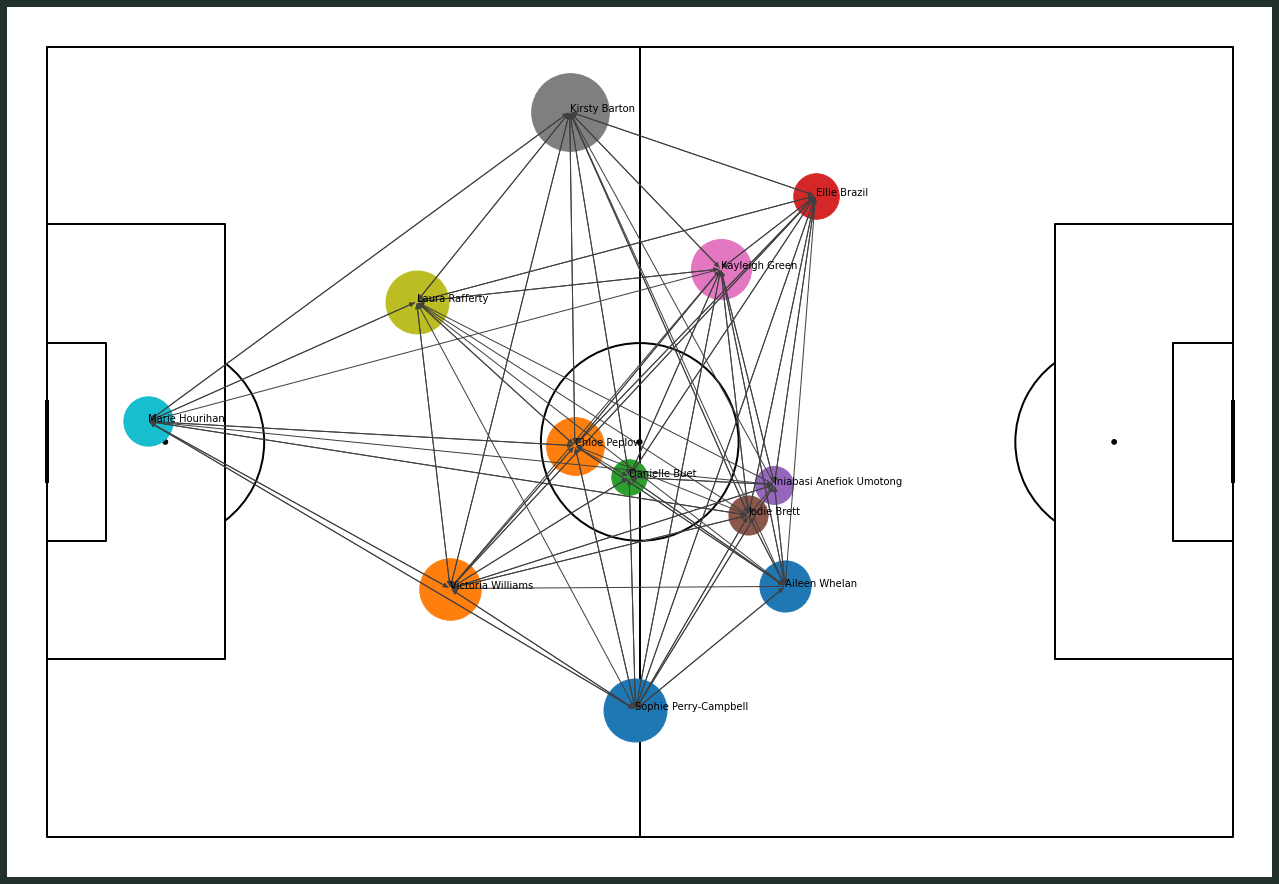

In [32]:
arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5

# DRawing the plot
fig,ax = plt.subplots(figsize=(28,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Drawing the pitch over the plot
pitch = Pitch(pitch_color='white',line_color='black',stripe=False)
pitch.draw(ax=ax)

#Invert Y axis
plt.gca().invert_yaxis()


    
for i,row in passes.iterrows():
        ax.annotate("",xy=(row['X start'],row['Y start']),xytext=(row['X end'],row['Y end']),arrowprops=dict(arrowstyle="-|>", color="0.25"))

for i, row in pos_pass.iterrows():

    plt.scatter(row['X start'],row['Y start'],s=row['Count']*90)
    plt.annotate(row['Player'],(row['X start'],row['Y start']))
